In [3]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Haversine Formula

The Haversine formula is used to calculate the distance between two points on the Earth's surface given their latitude and longitude.

$
d = 2r \times \arcsin\left(\sqrt{\sin^2\left(\frac{\Delta\phi}{2}\right) + \cos(\phi_1) \cdot \cos(\phi_2) \cdot \sin^2\left(\frac{\Delta\lambda}{2}\right)}\right)
$

Where:

- $\phi_1$ and $\phi_2$ are the latitudes of the two points in radians.
- $\lambda_1$ and $\lambda_2$ are the longitudes of the two points in radians.
- $\Delta\phi = \phi_2 - \phi_1$ is the difference in latitudes.
- $\Delta\lambda = \lambda_2 - \lambda_1$ is the difference in longitudes.
- $r$ is the Earth’s radius (mean radius = 6,371 kilometers).

In [4]:

# Haversine function to compute the distance in kilometers
def haversine(lat1, lon1, lat2, lon2):
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    # Radius of Earth in kilometers
    r = 6371  # kilometers
    return c * r

In [5]:
# Data from the table
data = {
    'City #': list(range(1, 8)),  # Create City # from 1 to 7
    'Latitude': [53.4, 51.8, 53.4, 52.6, 52.3, 54.3, 52.5],
    'Longitude': [-6.2, -8.3, -9.0, -8.6, -7.1, -8.5, -8.2],
    'Population': [1458154, 584156, 277737, 209536, 127363, 70198, 167895],
    'Distance_to_Capital': [0] * 7   # Assign default value of 0 for Distance_to_Capital
}

# Create a pandas DataFrame for
df = pd.DataFrame(data)
print(df)

   City #  Latitude  Longitude  Population  Distance_to_Capital
0       1      53.4       -6.2     1458154                    0
1       2      51.8       -8.3      584156                    0
2       3      53.4       -9.0      277737                    0
3       4      52.6       -8.6      209536                    0
4       5      52.3       -7.1      127363                    0
5       6      54.3       -8.5       70198                    0
6       7      52.5       -8.2      167895                    0


Center of Gravity Latitude:


${Center\_Gravity\_Latitude} = \frac{\sum{c \in C} ({Population} \times {Latitude})}{{Total Population}}$


Center of Gravity Longitude:


${Center\_Gravity\_Longitude} = \frac{\sum{c \in C} ({Population} \times {Longitude})}{{Total Population}}$


${Weighted\_Average\_Distance} = \frac{\sum{c \in C} ({Population} \times {Distance\_to\_Capital})}{{Total Population}}$


In [9]:
total_population = df['Population'].sum()  # Total population

# Variables to track the best city as the capital candidate
best_city = None
best_weighted_distance = float('inf')  # Set initial value to a large number
best_percent_cities_within_500km = 0
best_city_latitude = None
best_city_longitude = None

# Loop over each city to test it as the capital
for index, row in df.iterrows():
    Capital_Latitude = row['Latitude']
    Capital_Longitude = row['Longitude']

    # Compute the distance to the capital for each city using the Haversine formula
    df['Distance_to_Capital'] = df.apply(
    lambda city_row: haversine(city_row['Latitude'], city_row['Longitude'], Capital_Latitude, Capital_Longitude), axis=1)

    # Compute the Weighted_Average_Distance
    weighted_distance_sum = (df['Population'] * df['Distance_to_Capital']).sum()  # Sum of (Population * distance)
    Weighted_Average_Distance = weighted_distance_sum / total_population

    # Calculate the percentage of cities within 500 km
    cities_within_500km = df[df['Distance_to_Capital'] <= 500].shape[0]
    percent_cities_within_500km = (cities_within_500km / df.shape[0]) * 100

    # Check if this city is the best candidate based on weighted average distance
    if Weighted_Average_Distance < best_weighted_distance:
        best_city = row['City #']
        best_weighted_distance = Weighted_Average_Distance
        best_percent_cities_within_500km = percent_cities_within_500km
        best_city_latitude = row['Latitude']
        best_city_longitude = row['Longitude']

    # Output the results for this candidate city
    print(f"City {row['City #']} as Recommended Amazon WH:")
    print(f"Weighted Average Distance to Recommended Amazon WH: {Weighted_Average_Distance:.2f} km")
    print(f"Percentage of Cities within 500 km of the Recommended Amazon WH: {percent_cities_within_500km:.2f}%\n")
    -Distance_to_Capital
     print(f"Distance to Recommended Amazon WH: {Distance:.2f} km")

# Assign Capital_Latitude and Capital_Longitude to the best city's latitude and longitude
Capital_Latitude = best_city_latitude
Capital_Longitude = best_city_longitude

# Output the best city as the capital
print(f"\nBest City as Recommended Amazon WH: City {best_city}")
print(f"Best Weighted Average Distance: {best_weighted_distance:.2f} km")
print(f"Percentage of Cities within 500 km of the Recommended Amazon WH: {best_percent_cities_within_500km:.2f}%")
print(f"Recommended Amazon WH Latitude: {Capital_Latitude}")
print(f"Recommended Amazon WH Longitude: {Capital_Longitude}")



IndentationError: unexpected indent (<ipython-input-9-205544ccaaf1>, line 40)

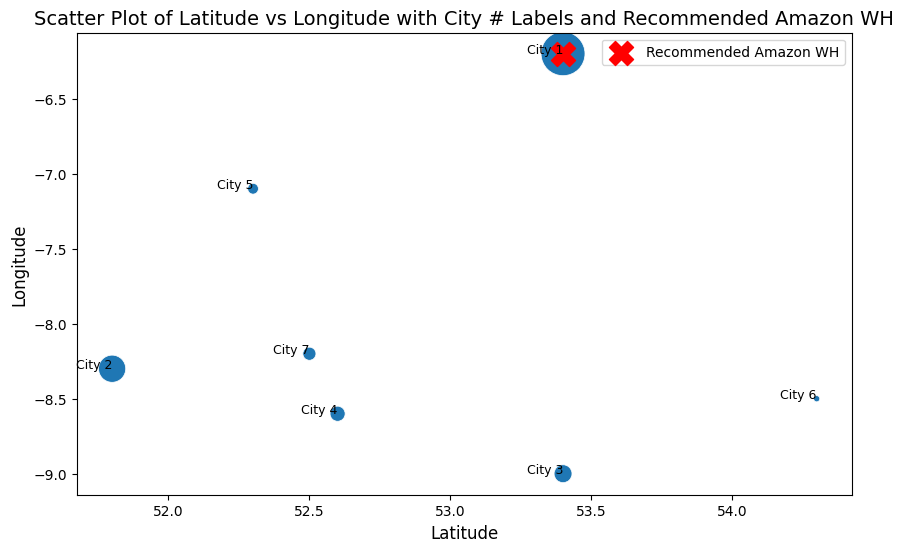

   City #  Latitude  Longitude  Population  Distance_to_Capital
0       1      53.4       -6.2     1458154           167.229208
1       2      51.8       -8.3      584156            78.134890
2       3      53.4       -9.0      277737           113.522381
3       4      52.6       -8.6      209536            29.242235
4       5      52.3       -7.1      127363            77.871694
5       6      54.3       -8.5       70198           201.136119
6       7      52.5       -8.2      167895             0.000000


In [7]:
# Initialize the plot
plt.figure(figsize=(10, 6))

# Create the scatter plot using seaborn for cities
sns.scatterplot(x='Latitude', y='Longitude', size='Population', data=df, sizes=(20, 1000), legend=False)

# Plot the capital location with a distinct marker and label it
plt.scatter(Capital_Latitude, Capital_Longitude, color='red', s=300, marker='X', label='Recommended Amazon WH')

# Add labels to each point for City #
for i in range(df.shape[0]):
    plt.text(df['Latitude'][i], df['Longitude'][i], f"City {df['City #'][i]}", fontsize=9, ha='right')

# Add labels and title
plt.title("Scatter Plot of Latitude vs Longitude with City # Labels and Recommended Amazon WH", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Longitude", fontsize=12)

# Add legend, forcing the label to be displayed
plt.legend(loc='upper right')

# Show the plot
plt.show()

# Print the DataFrame to see the updated Distance_to_Capital column
print(df)

In [8]:
# Export the DataFrame to a CSV file
output_file = 'city_data_with_distances.csv'
df.to_csv(output_file, index=False)

print(f"DataFrame exported to {output_file}")

DataFrame exported to city_data_with_distances.csv
